# TTI109 - Estatística

## Instruções para uso das funções de teste de hipótese

Nas 4 células ocultas abaixo estão os códigos das funções:

* `TH_media_z`: Função para teste de hipótese da média populacional $\mu$, com nível de significância $\alpha$, supondo desvio padrão populacional $\sigma$ conhecido (uso do valor-p).
    
* `TH_media_z_regiao`: Idem anterior, porém utilizando as regiões de rejeição como critério de decisão.

* `TH_media_t`: Função para teste de hipótese da média $\mu$, com nível de significância $\alpha$, supondo desvio padrão populacional $\sigma$ desconhecido.

* `TH_vardp_chi2`: Função para teste de hipótese da variância $\sigma^2$ ou do desvio padrão $\sigma$ populacionais, com nível de significância $\alpha$.

**IMPORTANTE:** Execute as células ocultas! Não é necessário visualizá-las para que as funçõe sestejam disponíveis para uso. Entertanto, caso deseje verificar os códigos, clique no triângulo preto que antedece o título "Instruções para uso das funções de teste de hipótese".

In [ ]:
def TH_media_z(x_barra=None, n_amostras=None, mu=None,
               sigma=None, alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média populacional mu, com nível de
  significância alpha, supondo desvio padrão populacional sigma conhecido.
  ENTRADA:
  - x_barra: média amostral
  - n_amostras: número de amostras coletadas no experimento
  - mu: hipótese nula para a média populacional
  - sigma: desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAíDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - p_valor: valor p do teste de hipótese'''

  from scipy import stats as st

  # Criação da distribuição amostral das médias
  dist_amostras = st.norm(loc=mu, scale=sigma/n_amostras**0.5)

  # Cálculo do p-valor, de acordo com o tipo de teste
  if teste == 'esquerda':
    p_valor = dist_amostras.cdf(x_barra)
    tipo = 'unilateral à esquerda'
  elif teste == 'direita':
    p_valor = dist_amostras.sf(x_barra)
    tipo = 'unilateral à direita'
  elif teste == 'bilateral':
    p_valor =  2*abs(dist_amostras.cdf(x_barra))
    tipo = 'bilateral'

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print('*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***')
    print(f'Teste {tipo} com p-valor = {p_valor:.6f}')
    if p_valor <= alpha:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return p_valor

In [ ]:
def TH_media_z_regiao(x_barra=None, n_amostras=None, mu=None,
                      sigma=None, alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média populacional mu, com nível de
  significância alpha, supondo desvio padrão populacional sigma conhecido.
  ENTRADA:
  - x_barra: média amostral
  - n_amostras: número de amostras coletadas no experimento
  - mu: hipótese nula para a média populacional
  - sigma: desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAíDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - z0: valor z crítico do teste de hipótese (fronteira da região de rejeição)'''

  from scipy import stats as st

  # Criação da distribuição normal padrão
  dist_padrao = st.norm(loc=0, scale=1)

  # Cálculo da estatística de teste padronizada
  z = (x_barra-mu)/(sigma/n_amostras**0.5)

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do z crítico, de acordo com o tipo de teste
  if teste == 'esquerda':
    z0 = dist_padrao.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de z à região de rejeição
    if z <= z0:
      rejeicao = True
  elif teste == 'direita':
    z0 = dist_padrao.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de z à região de rejeição
    if z >= z0:
      rejeicao = True
  elif teste == 'bilateral':
    z0 = dist_padrao.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de z à região de rejeição
    if (z <= z0) or (z >= -z0):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
     print('*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***')
     print(f'Teste {tipo} com z0 = {z0:.6f}')
     if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
     else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return z0

In [ ]:
def TH_media_t(x_barra=None, n_amostras=None, mu=None, s=None,
               alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média mu, com nível de significância
     alpha, supondo desvio padrão populacional sigma desconhecido.
     ENTRADA:
     - x_barra: média amostral
     - n_amostras: número de amostras coletadas no experimento
     - mu: hipótese nula para a média populacional
     - s: desvio padrão amostral
     - alpha: nível de significância adotado no teste (valor default 0.05)
     - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
     para teste unilateral à esquerda, 'direita', para teste unilateral à direita
     e 'bilateral' para teste bilateral (valor default 'esquerda')
     - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
     (valor default=True)
     SAÍDA:
     - relatório de conclusão do teste de hipótese, caso cocnlusao=True
     - t0: valor crítico do teste de hipótese'''

  from scipy import stats as st

  # Criação da distribuição t
  dist_t = st.t(df=n_amostras-1)

  # Cálculo da estatística de teste padronizada
  t = (x_barra-mu)/(s/n_amostras**0.5)

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do t crítico (t0), de acordo com o tipo de teste
  if teste == 'esquerda':
    t0 = dist_t.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de t à região de rejeição
    if t <= t0:
      rejeicao = True
  elif teste == 'direita':
    t0 = dist_t.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de t à região de rejeição
    if t >= t0:
      rejeicao = True
  elif teste == 'bilateral':
    t0 = dist_t.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de t à região de rejeição
    if (t <= t0) or (t >= -t0):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print('*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***')
    print(f'Teste {tipo} com t0 = {t0:.5f}')
    if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return t0

In [ ]:
def TH_vardp_chi2(est_amostral=None, n_amostras=None, val_parametro=None,
                  parametro='sigma', alpha=0.05, teste='esquerda',
                  conclusao=True):
  '''Função para teste de hipótese da variância ou do desvio padrão populacional,
  com nível de significância alpha.
  ENTRADA:
  - est_amostral: variância ou desvio padrão amostral
  - n_amostras: número de amostras coletadas no experimento
  - val_parametro = valor a ser testado, seja variância ou desvio padrão
  - parametro = 'sigma2' para teste de variância e 'sigma' para teste de
  desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAÍDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - chi2: valor da estatística padronizada
  - X20: valor(es) crítico(s) do teste'''

  from scipy import stats as st

  # Criação da distribuição chi-quadrado
  dist_chi2 = st.chi2(df=n_amostras-1)

  # Cálculo da estatística de teste padronizada
  if parametro == 'sigma2':
    chi2 = (n_amostras-1)*est_amostral/val_parametro
    param = 'variância'
  elif parametro == 'sigma':
    chi2 = (n_amostras-1)*est_amostral**2/val_parametro**2
    param = 'desvio padrão'

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do chi2 crítico, de acordo com o tipo de teste
  if teste == 'esquerda':
    X20 = dist_chi2.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de X20 à região de rejeição
    if chi2 <= X20:
      rejeicao = True
  elif teste == 'direita':
    X20 = dist_chi2.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de X20 à região de rejeição
    if chi2 >= X20:
      rejeicao = True
  elif teste == 'bilateral':
    X2L = dist_chi2.ppf(alpha/2)
    X2R = dist_chi2.ppf(1-alpha/2)
    tipo = 'bilateral'
    X20 = (X2L, X2R)
    # Decisão sobre pertinência de X20 à região de rejeição
    if (chi2 <= X2L) or (chi2 >= X2R):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print(f'*** Teste de hipótese para {param} populacional ***')
    print(f'Teste {tipo} com:')
    print(f'Estatística de teste padronizada = {chi2:.4f}')
    if isinstance(X20, tuple):
      print(f'Valores chi-quadrado críticos X2L = {X20[0]:.4f} e X2R = {X20[1]:.4f}')
    else:
      print(f'Valor chi-quadrado crítico = {X20:.4f}')
    if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return chi2, X20

## Importações dos módulos básicos

In [ ]:
# Importação de módulos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

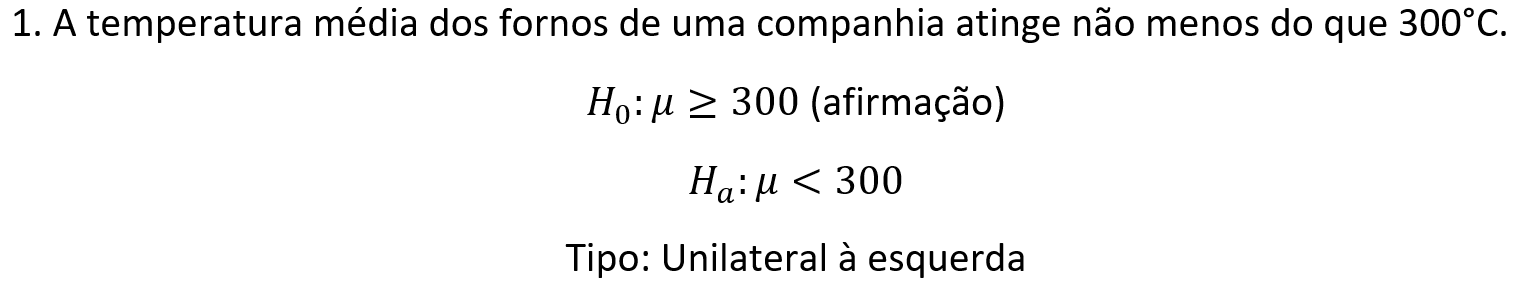

Experimento: 35 fornos analisados, com temperatura média de 290°C e desvio padrão de 10°C. Testar a hipótese nula com 5% de significância.

In [ ]:
# Teste de média com sigma desconhecido
t0 = TH_media_t(x_barra=290, n_amostras=35, mu=300,
                s=10, alpha=0.05, teste='esquerda',
                conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***
Teste unilateral à esquerda com t0 = -1.69092
Hipótese nula rejeitada ao nível de significância 5.0%


In [5]:
'''Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para refutar a afirmação de que a temperatura média dos fornos é maior ou igual a 300°C'''

'Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para refutar a afirmação de que a temperatura média dos fornos é maior ou igual a 300°C'

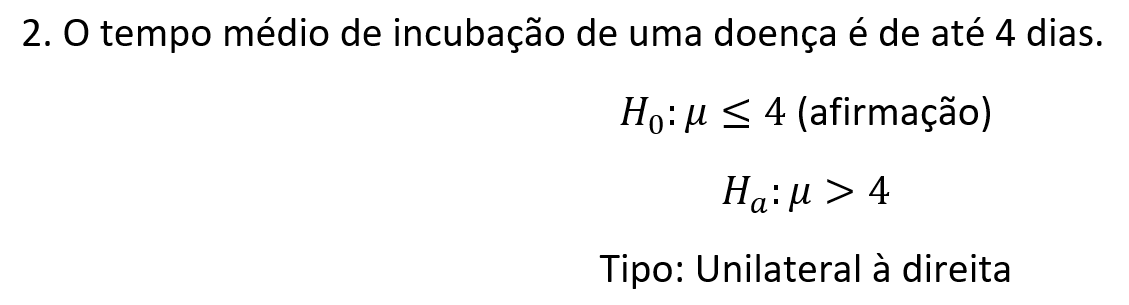

Experimento: 16 pacientes analisados, com tempo de incubação médio de 4,3 dias. De estudos anteriores, sabe-se que o desvio padrão do tempo de incubação é de 0,8 dias. Testar a hipótese nula com 5% de significância.

In [ ]:
# Teste da média com sigma conhecido
valor_p = TH_media_z(x_barra=4.3, n_amostras=16, mu=4, sigma=0.8,
                     alpha=0.05, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à direita com p-valor = 0.066807
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [4]:
'''Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para concordar com a afirmação de que o tempo médio de incubação é menor ou igual a 4 dias'''

'Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para concordar com a afirmação de que o tempo médio de incubação é menor ou igual a 4 dias'

In [ ]:
# Também poderia ser usada essa solução:
z0 = TH_media_z_regiao(x_barra=4.3, n_amostras=16, mu=4, sigma=0.8,
                     alpha=0.05, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à direita com z0 = 1.644854
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


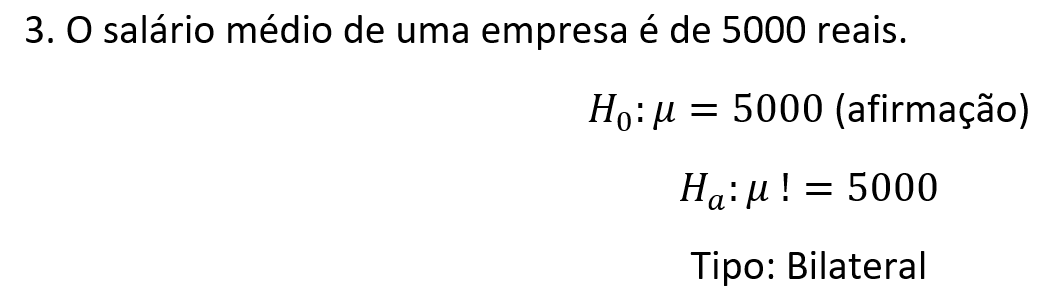

Experimento: 45 funcionários analisados, com média salarial de 4450 reais e desvio padrão de 650 reais. Testar a hipótese com 5% de sigbnificância.

In [ ]:
# Teste de hipótese com sigma desconhecido
t0 = TH_media_t(x_barra=4450, n_amostras=45, mu=5000,
                s=650, alpha=0.05, teste='bilateral',
                conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***
Teste bilateral com t0 = -2.01537
Hipótese nula rejeitada ao nível de significância 5.0%


In [3]:
'''Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para refutar a afirmação de que o salário médio é igual a 5000 reais'''

'Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para refutar a afirmação de que o salário médio é igual a 5000 reais'

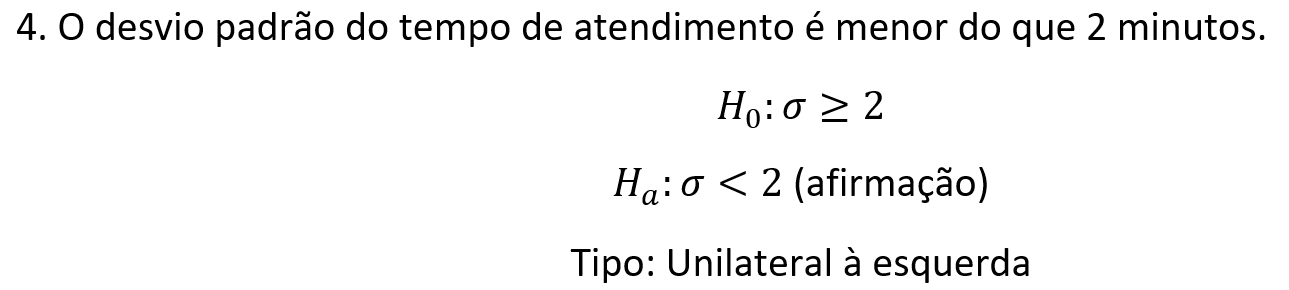

Experimento: 23 tempos de atendimento analisados, com desvio padrão de 2,5 minutos. Testar hipótese com 5% de significância.

In [ ]:
# Teste de desvio padrão
chi2, X20 = TH_vardp_chi2(est_amostral=2.5, n_amostras=23, val_parametro=2,
              parametro='sigma', alpha=0.05, teste='esquerda',
              conclusao=True)

*** Teste de hipótese para desvio padrão populacional ***
Teste unilateral à esquerda com:
Estatística de teste padronizada = 34.3750
Valor chi-quadrado crítico = 12.3380
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [2]:
'''Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para refutar a afirmação de que o desvio padrão médio do tempo de atendimento é menor do que 2 minutos'''

'Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para refutar a afirmação de que o desvio padrão médio do tempo de atendimento é menor do que 2 minutos'

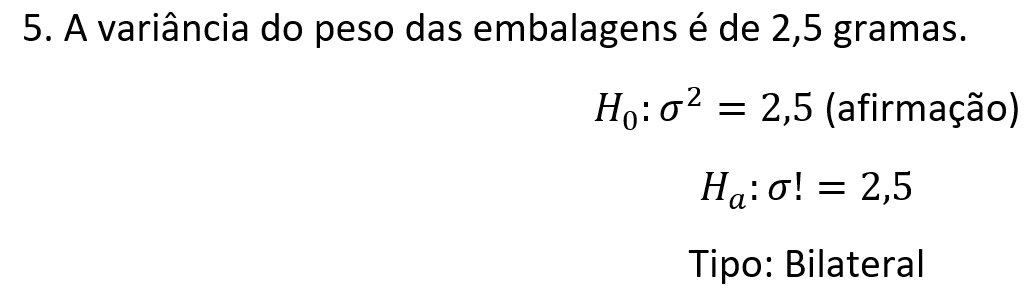

Experimento: 40 embalagens inpsecionadas, com variância do peso de 2,8 gramas. Testar hipótese com 5% de significância.

In [ ]:
# Teste de variância
chi2, X20 = TH_vardp_chi2(est_amostral=2.8, n_amostras=40, val_parametro=2.5,
              parametro='sigma2', alpha=0.05, teste='bilateral',
              conclusao=True)

*** Teste de hipótese para variância populacional ***
Teste bilateral com:
Estatística de teste padronizada = 43.6800
Valores chi-quadrado críticos X2L = 23.6543 e X2R = 58.1201
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [1]:
'''Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para concordar com a afirmação de que a variância dos pesos é de 2,5 gramas'''

'Conclusão: Há evidências estatísticas suficientes ao nível de significância de 5% para concordar com a afirmação de que a variância dos pesos é de 2,5 gramas'

Cálculo de média e desvio padrão usando Pandas ou numpy

In [ ]:
x = 6.9 * np.random.randn(1,30) + 14
x.shape

(1, 30)

In [ ]:
# Média amostral
x.mean()

15.612307814376658

In [ ]:
# Desvio padrão amostral
x.std(ddof=1)

6.244252020619643

In [ ]:
# Variância amostral
x.var(ddof=1)

38.990683297012495